# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [1]:
# Import the necessary libraries and CSVs. Make some dataframes!
import pandas as pd
import numpy as np
import matplotlib as plt

HR_Data = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\eda-checkpoint-starter-main\Human_Resources_Data.csv")

HR_Data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt

HR_Data = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\eda-checkpoint-starter-main\Human_Resources_Data.csv")

# 1st few rows to view the data's structure
print(HR_Data.head())

# Missing data
missing_data = HR_Data.isnull().sum()
print(missing_data)



   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                 157.0   
1                0.80             0.86               5                 262.0   
2                0.11             0.88               7                 272.0   
3                0.72             0.87               5                 223.0   
4                0.37             0.52               2                   NaN   

   time_spend_company  work_accident left  promotion_last_5years is_smoker  \
0                 3.0              0  yes                      0       NaN   
1                 6.0              0  yes                      0       yes   
2                 4.0              0  yes                      0       NaN   
3                 5.0              0  yes                      0       NaN   
4                 NaN              0  yes                      0        no   

  department  salary  
0      sales     low  
1   

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

HR_Data = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\eda-checkpoint-starter-main\Human_Resources_Data.csv")

# IQR for average_montly_hours
Q1_hours = HR_Data['average_montly_hours'].quantile(0.25)
Q3_hours = HR_Data['average_montly_hours'].quantile(0.75)
IQR_hours = Q3_hours - Q1_hours
lower_bound_hours = Q1_hours - 1.5 * IQR_hours
upper_bound_hours = Q3_hours + 1.5 * IQR_hours

# outliers for average_montly_hours
HR_Data['average_montly_hours'] = np.where(HR_Data['average_montly_hours'] < lower_bound_hours, lower_bound_hours, HR_Data['average_montly_hours'])
HR_Data['average_montly_hours'] = np.where(HR_Data['average_montly_hours'] > upper_bound_hours, upper_bound_hours, HR_Data['average_montly_hours'])

# IQR for time_spend_company
Q1_time = HR_Data['time_spend_company'].quantile(0.25)
Q3_time = HR_Data['time_spend_company'].quantile(0.75)
IQR_time = Q3_time - Q1_time
lower_bound_time = Q1_time - 1.5 * IQR_time
upper_bound_time = Q3_time + 1.5 * IQR_time

# outliers for time_spend_company
HR_Data['time_spend_company'] = np.where(HR_Data['time_spend_company'] < lower_bound_time, lower_bound_time, HR_Data['time_spend_company'])
HR_Data['time_spend_company'] = np.where(HR_Data['time_spend_company'] > upper_bound_time, upper_bound_time, HR_Data['time_spend_company'])

# cleaned dataset
HR_Data.to_csv('Cleaned_HR_Data.csv', index=False)

# Print
print(HR_Data.describe())



       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  work_accident  \
count          14631.000000        14848.000000   14999.000000   
mean             200.958376            3.360688       0.144610   
std               50.002307            1.086111       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.0000

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

Dropped promotion_last_5years due to low variance.


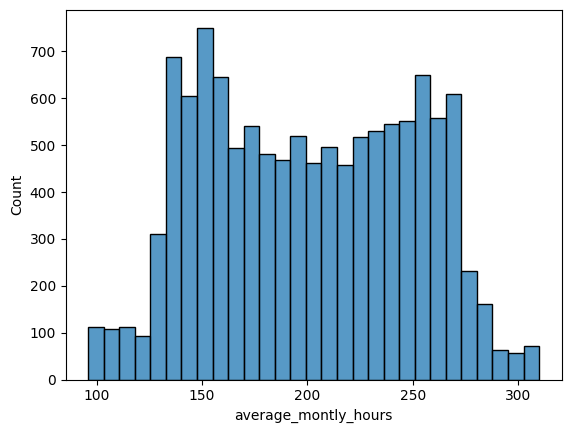

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

HR_Data = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\eda-checkpoint-starter-main\Human_Resources_Data.csv")

# Identify and drop duplicates
HR_Data = HR_Data.drop_duplicates()

# Drop irrelevant
if 'is_smoker' in HR_Data.columns:
    HR_Data = HR_Data.drop(columns=['is_smoker'])

# low variance
for col in HR_Data.columns:
    if HR_Data[col].nunique() < 2 or HR_Data[col].value_counts(normalize=True).iloc[0] > 0.95:
        HR_Data = HR_Data.drop(columns=[col])
        print(f"Dropped {col} due to low variance.")

# date column, remove data before 2020
if 'date' in HR_Data.columns:
    HR_Data['date'] = pd.to_datetime(HR_Data['date'])
    HR_Data = HR_Data[HR_Data['date'].dt.year >= 2020]


# Bar Chart
sns.histplot(HR_Data['average_montly_hours'])
plt.show()



## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'it'
 'product_mng' 'marketing' 'randd']
['low' 'medium' 'high']


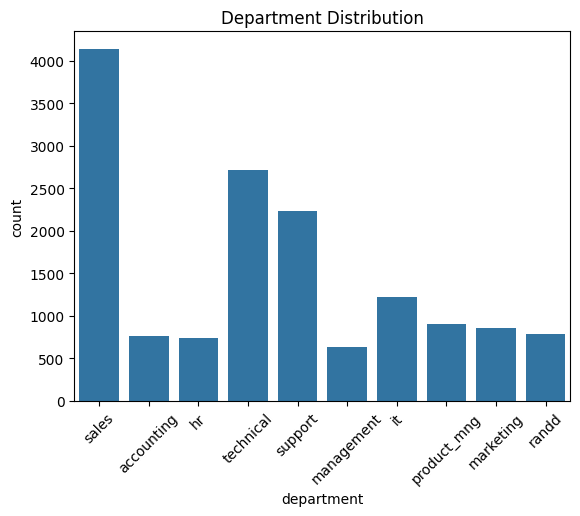

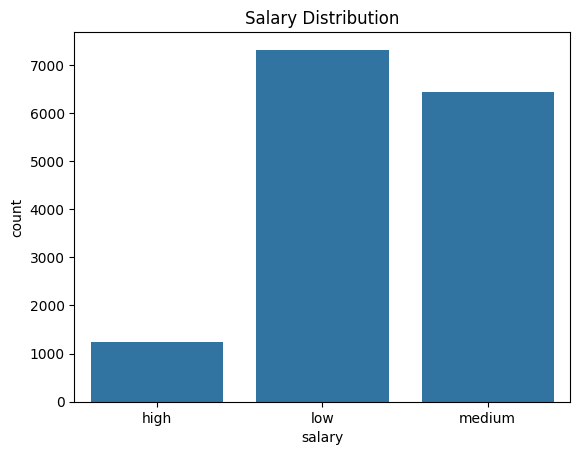

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

HR_Data = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\eda-checkpoint-starter-main\Human_Resources_Data.csv")

# Standardizing department
HR_Data['department'] = HR_Data['department'].str.lower().str.strip()

# check for inconsistencies
print(HR_Data['department'].unique())
print(HR_Data['salary'].unique())

# salary categorical data
HR_Data['salary'] = pd.Categorical(HR_Data['salary'])

# yes/no boolean
HR_Data['left'] = HR_Data['left'].map({'yes': True, 'no': False})

# date format
if 'date' in HR_Data.columns:
    HR_Data['date'] = pd.to_datetime(HR_Data['date'], format='%Y-%m-%d')

# histograms plot
sns.countplot(x='department', data=HR_Data)
plt.title('Department Distribution')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='salary', data=HR_Data)
plt.title('Salary Distribution')
plt.show()


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

In [1]:
# 1. Did you find all four types of dirty data in your dataset?

#  Missing Data: was identified in my dataset 
#  Duplicate Data: was removed to ensure data uniqueness 
#  Unnecessary Data: was identified and reduced to streamline the data
# for a more focus analysis
# Inconsistent Data: was standardized and corrected. This is critical for
# accurate data analysis and modeling

In [ ]:
# 2. Did the process of cleaning your data give you new insights into your dataset?
# The insights I gained from the data cleaning was:
# Understanding of the data quality, Revealing Data Distro,
# Idenfity of key variables, standardizing and consistency, 
# insights from visualization and improved model performance

In [ ]:
# 3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
# Things to make note of are: Data Prep is Key, consistency in categorization, 
#  insights from visuals, Reflecting on data changes, and iterative process